<a href="https://colab.research.google.com/github/Rakeshtahashildar7/Bike--sharing-prediction--supervised-machine-learning/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 - RAKESH TAHASHILDAR
##### **Team Member 2 - AMEER MALIKASAB NADAF

# **Problem Statement -**

In the era of sustainable transportation and urban mobility, bike-sharing systems have gained significant popularity as an eco-friendly and cost-effective means of transportation. To ensure a seamless and satisfying experience for users, bike-sharing companies need to maintain a stable supply of rental bikes at each station throughout the day. However, the demand for bikes fluctuates based on various factors such as weather conditions, day of the week, holidays, and special events, making it challenging to accurately predict the required bike count for each hour.

The objective of this project is to develop a robust predictive model that can accurately forecast the number of bikes needed at each hour for a stable supply of rental bikes in the bike-sharing system. The model should take into account historical usage patterns, weather data, day of the week, holidays, and any other relevant factors that may influence bike demand.

# **Business Context -**

The bike-sharing industry has experienced substantial growth in recent years, driven by increasing concerns about environmental sustainability and the demand for convenient and eco-friendly transportation options. As urban populations continue to expand, bike-sharing companies have emerged as essential players in the urban mobility landscape, offering a flexible and efficient means of commuting within cities.

In this context, the stable supply of rental bikes becomes a critical factor in ensuring a seamless experience for users and maximizing the overall efficiency of the bike-sharing system. Maintaining an adequate number of bikes at each station throughout the day is essential to meet fluctuating customer demand and prevent bike shortages or overcrowded stations, which can lead to dissatisfied customers and lost revenue opportunities.

However, accurately predicting bike demand on an hourly basis presents a significant challenge due to the dynamic and multifaceted nature of the demand patterns. Several factors influence the need for bikes at different times of the day, including weather conditions, day of the week, seasonal variations, special events, and holidays. To address this challenge, bike-sharing companies seek to leverage advanced predictive modeling techniques that can analyze historical data, external factors, and user behavior to forecast bike demand accurately.

# **GitHub Link -**

https://github.com/Coding-bot007/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Mounting the google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from time import time
from sklearn.metrics import r2_score
import xgboost as xgb

### Dataset Loading

In [ ]:
#Creating the dataframe for the given dataset
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'unicode_escape')
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
#getting the shape of dataframe
df.shape

(8760, 14)

# Basic Data Exploration

In [ ]:
# Dataset First Look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# checking the duplicate values if there in the dataset
print(f'we have {len(df[df.duplicated()])} duplicate values')

we have 0 duplicate values


In [ ]:
# cheking for the null values
df.isna().sum().sum()

0

### Dataset Information

In [ ]:
# checking the type of date as from the data.info() we got to know that its an object type
type(df['Date'][0])

str

In [ ]:
# converting date variable in to datetime datatype
from datetime import datetime as dt
df['Date'] = df['Date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# checking the type  again for confirming
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# checking the unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

 **Seasons , Holiday and Functioning Day are categorical variables**

In [ ]:
#dataset description with a concise overview of data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**we can notice soloar radiation , rainfall and snowfall are highly positively skewed**

In [ ]:
# Renaming the columns
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
df.columns

Index(['date', 'rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
# columns to visualize its distributions and possible correlation
columns_to_view=df.columns[3:-3]


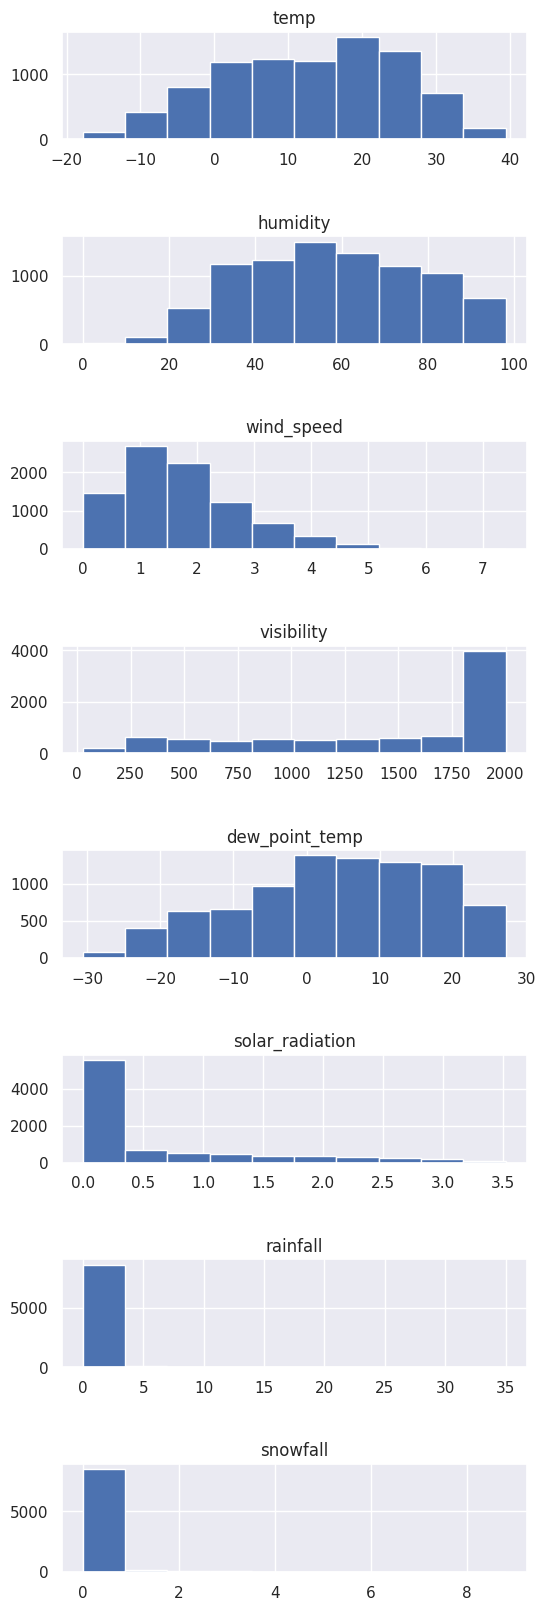

In [ ]:
from matplotlib.figure import Figure
fig,axis=plt.subplots(len(columns_to_view),figsize=(6,20))
fig.subplots_adjust(hspace=0.9,wspace=0.3)
for i in range(len(columns_to_view)):

  axis[i].set_title(str(columns_to_view[i]))
  axis[i].hist(df[columns_to_view[i]])


In [ ]:
# calculating the time span of dataset
print(" The number of days for which the dataset is collected is ",df['date'].max()-df['date'].min())

 The number of days for which the dataset is collected is  364 days 00:00:00


## **Observations about dataset**

*   **This dataset is collected from December 2017 to November 2018 , exactly 364 days. that makes it 1 year of time span**  
*   **This dataset contains 8760 instances and 14 attributes**

## **Data Cleaning and  Feature engineering**


**Breaking the date column into date , month and year**

In [ ]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day_name()

In [ ]:
df['day'].value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: day, dtype: int64

In [ ]:
df['weekdays_weekend']=df['day'].apply(lambda elem :1 if elem=='Saturday' or elem=='Sunday' else 0)
df.head(4)

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,day,weekdays_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


In [ ]:
df=df.drop(['date','year','day'],axis=1)



*   **first we breakdown the `date` column into `day ,month and year`**
*   **we have data from december 2017 to november 2018 , so this is basicaly 1 year of span , so we can ignore this `year` column**

*   **then we splited our days into `weekdays amd weekends` as this make more sense than using all the 7 days as labels, weekdays and wekends can be more helpful. As litreature survey says that generaly we can have more bike sharing in weekdays than weekends**



In [ ]:
df.head(4)

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [ ]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [ ]:
df.groupby(['weekdays_weekend'])['rented_bike_count'].mean()

weekdays_weekend
0    719.448914
1    667.342147
Name: rented_bike_count, dtype: float64

In [ ]:
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [ ]:
df.groupby(['holiday'])['rented_bike_count'].mean()

holiday
Holiday       499.756944
No Holiday    715.228026
Name: rented_bike_count, dtype: float64

In [ ]:
dependent_var='rented_bike_count'
independent_var=list(set(df.columns)-{dependent_var})
print(independent_var)

['humidity', 'solar_radiation', 'wind_speed', 'temp', 'rainfall', 'holiday', 'snowfall', 'month', 'weekdays_weekend', 'visibility', 'func_day', 'seasons', 'hour', 'dew_point_temp']


In [ ]:
for elem in independent_var:
  print(f' {elem}--->{type(df[elem][0])}')

 humidity---><class 'numpy.int64'>
 solar_radiation---><class 'numpy.float64'>
 wind_speed---><class 'numpy.float64'>
 temp---><class 'numpy.float64'>
 rainfall---><class 'numpy.float64'>
 holiday---><class 'str'>
 snowfall---><class 'numpy.float64'>
 month---><class 'numpy.int64'>
 weekdays_weekend---><class 'numpy.int64'>
 visibility---><class 'numpy.int64'>
 func_day---><class 'str'>
 seasons---><class 'str'>
 hour---><class 'numpy.int64'>
 dew_point_temp---><class 'numpy.float64'>


###our literature survey suggest that dew point temprature **`dew_point_temp`**  and temprature **`temp`** can be highly correlated

*   Lets chcek the relation between **`dew_point_temp`** and **`temp`**

<Axes: xlabel='dew_point_temp', ylabel='temp'>

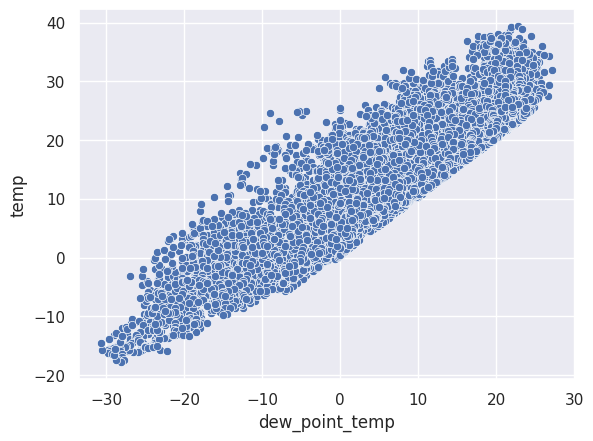

In [ ]:
# potting scatterplot between dew point temprature and temprature
sns.scatterplot(x=df['dew_point_temp'],y=df['temp'])

In [ ]:
# checking the correlation between dew_point_temp and	temp
df[['dew_point_temp','temp']].corr()

KeyError: ignored

<Axes: >

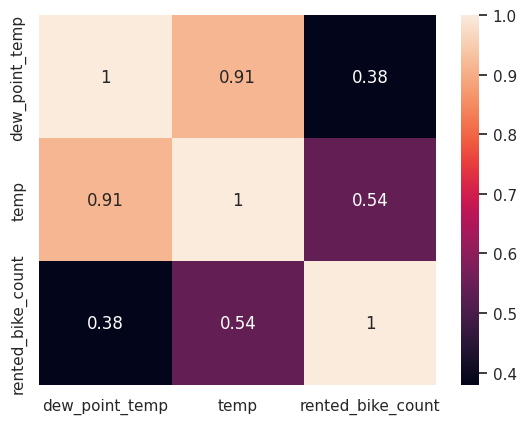

In [ ]:
sns.heatmap(df[['dew_point_temp','temp','rented_bike_count']].corr(),annot=True)

*   we can notice that **`dew_point_temp`** is low possitively correlated to **`rented_bike_count`** than **`temp`**, but both have impact on **`rented_bike_count`**` having possitive correlation

*   so we can try to combine both of them and will more weightage to **`temp`** than **`dew_point_temp`**



In [ ]:
# calculating weighted temprature from temp and dew point temp
df['weighted_temp']=0.7*df['temp']+0.3*df['dew_point_temp']

<Axes: >

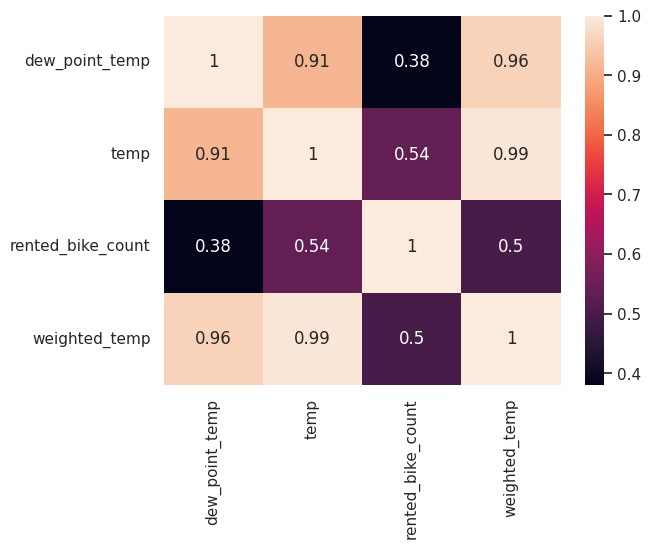

In [ ]:
sns.heatmap(df[['dew_point_temp','temp','rented_bike_count','weighted_temp']].corr(),annot=True)

## **Exploratory Data Analysis (EDA)**

**Dependent variable `rented_bike_counts` Anlysis**

<Axes: xlabel='rented_bike_count', ylabel='Density'>

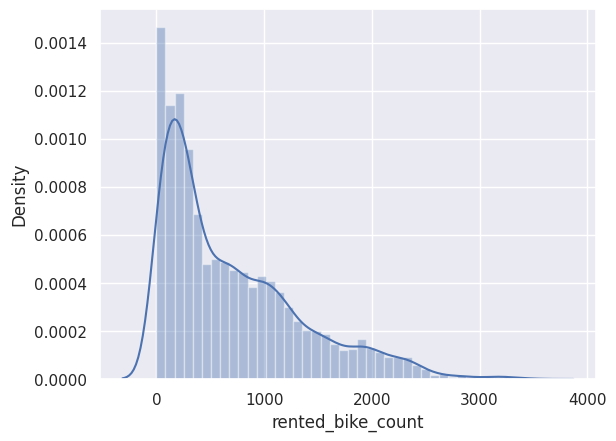

In [ ]:
sns.distplot(df[dependent_var])

In [ ]:
print(f'The skewness of the dependent variable is {df[dependent_var].skew()} ')

The skewness of the dependent variable is 1.1534281773679014 


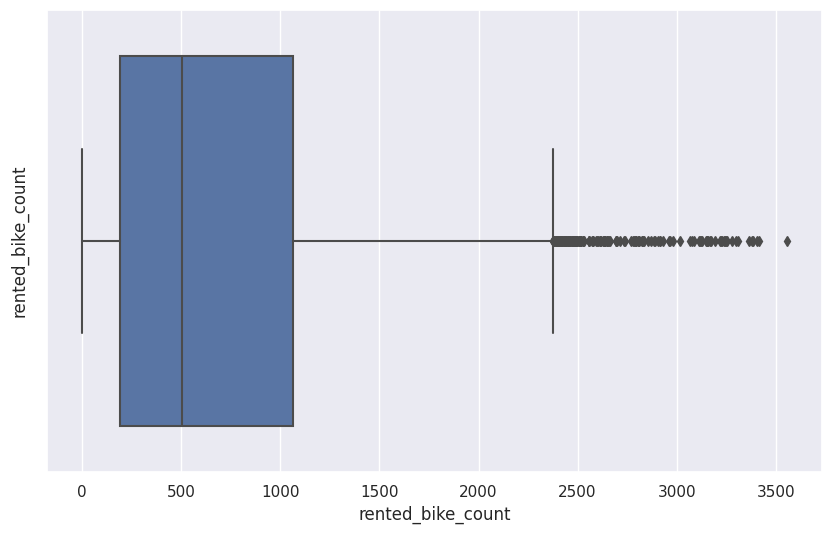

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('rented_bike_count')
sns.boxplot(x=df['rented_bike_count'])
plt.show()

**observation on original dependent variable**

*   **looks like positively skewed , we can apply log transformation, suare root tranformation  etc. to bring normality**

*  **We have some outliers too in original dependent variable**

<Axes: xlabel='rented_bike_count', ylabel='Density'>

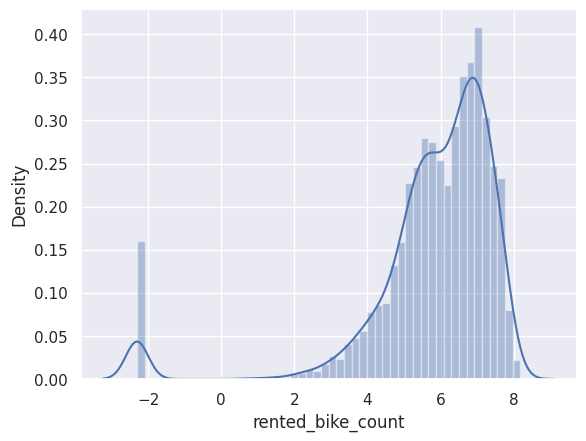

In [ ]:
# applying log transformation
sns.distplot(np.log(df[dependent_var]+0.1))

In [ ]:
print(f'The skewness of the log transformation is {np.log(df[dependent_var]+0.1).skew()} ')

The skewness of the log transformation is -2.6453665610058574 


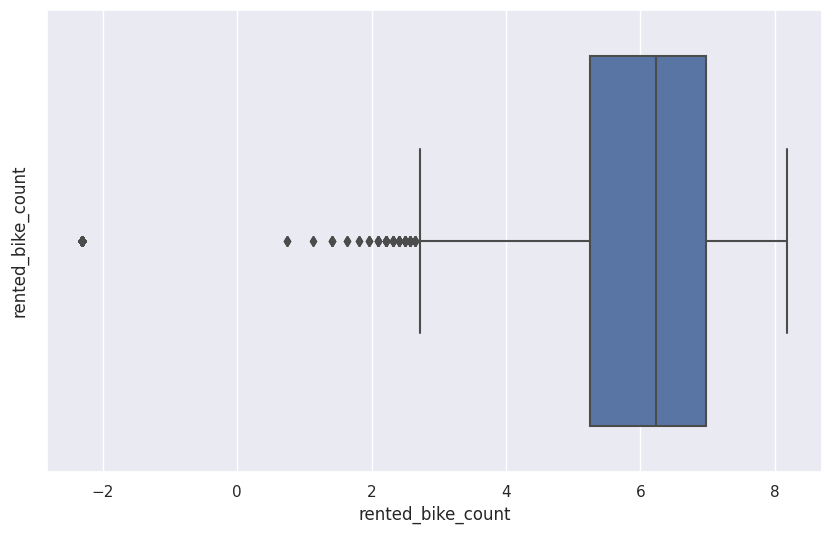

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('rented_bike_count')
sns.boxplot(x=np.log(df['rented_bike_count']+0.1))
plt.show()

*   **After applying the log tranformation we can notice that the skewness has been increased for the dependent variable also we have some outliers though**


*    **so lets try out square root transformation how it performs**



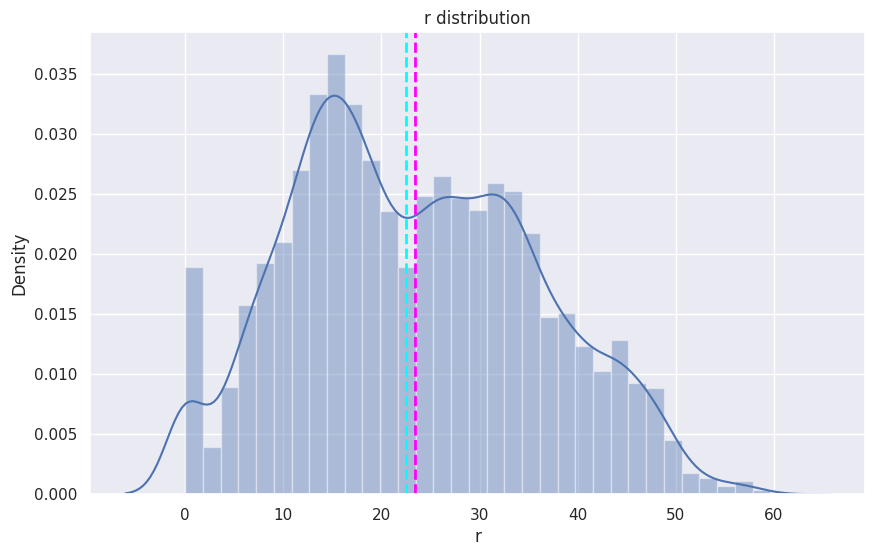

In [ ]:
# visualizing the distribution of dependent variable after square root transformation
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df[dependent_var]))
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')
plt.axvline(np.sqrt(df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

*   **It seems to be more Normal than what we obtained from log tranformation**


In [ ]:
# lets check its skewness
print(f'The skewness of the square root transformation is {np.sqrt(df[dependent_var]).skew()} ')

The skewness of the square root transformation is 0.237362090985412 


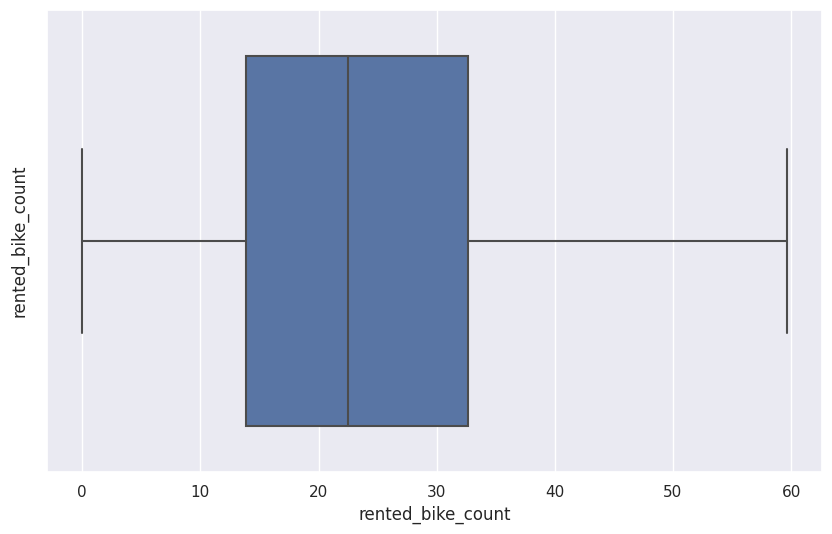

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('rented_bike_count')
sns.boxplot(x=np.sqrt(df['rented_bike_count']))
plt.show()



*   **It seems to follow normality**

*   **We dont have any outliers**
*   **Also the skewness is very less than our original dependent variable distribution**
*    **So square root transfromation can be a very good option here**



## **Continuous Independent variable Analyis**

In [ ]:
df.columns

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day', 'month',
       'weekdays_weekend', 'weighted_temp'],
      dtype='object')

<Figure size 800x500 with 0 Axes>

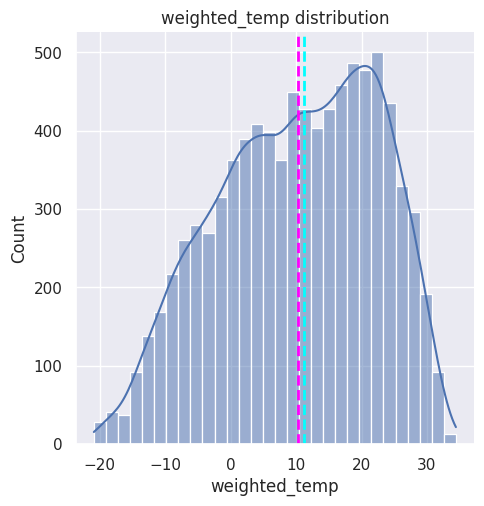

<Figure size 800x500 with 0 Axes>

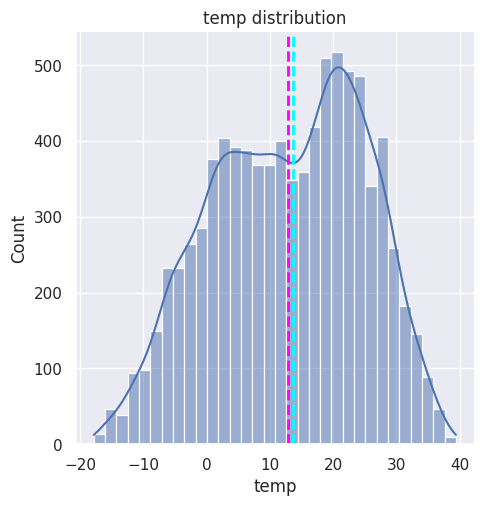

<Figure size 800x500 with 0 Axes>

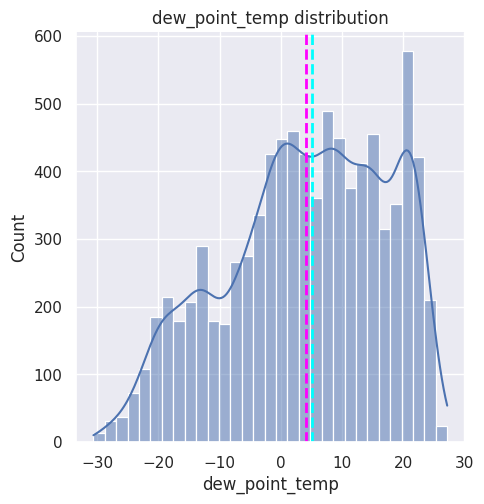

<Figure size 800x500 with 0 Axes>

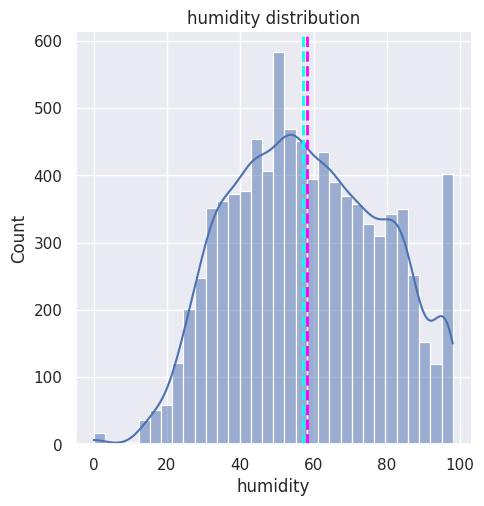

<Figure size 800x500 with 0 Axes>

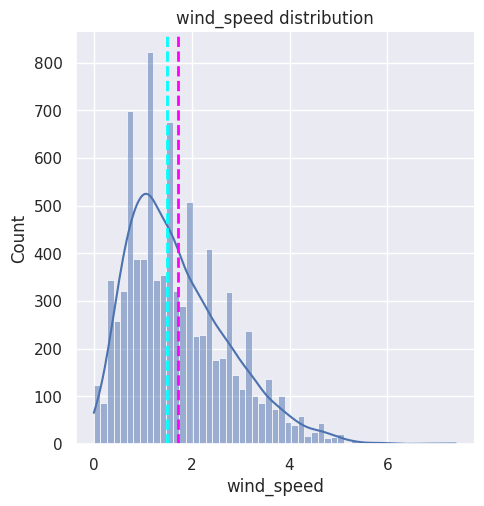

<Figure size 800x500 with 0 Axes>

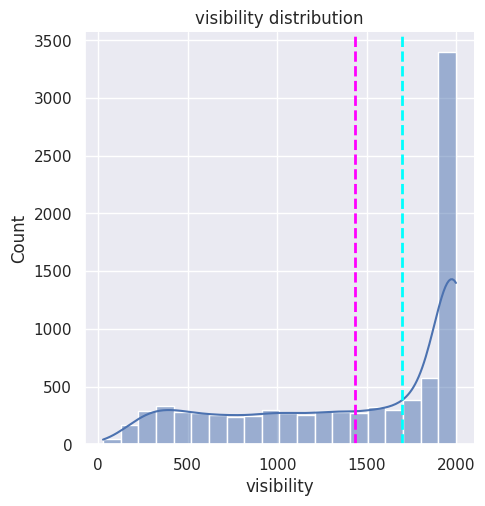

<Figure size 800x500 with 0 Axes>

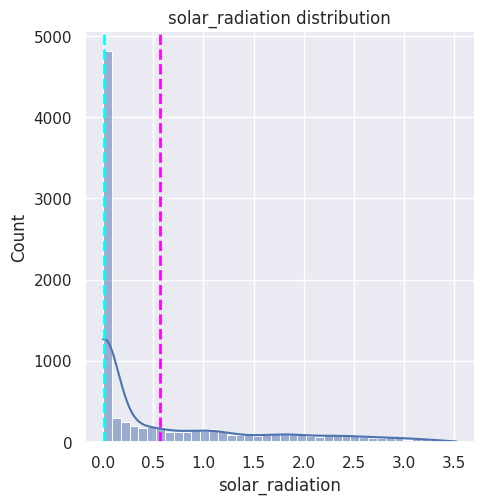

<Figure size 800x500 with 0 Axes>

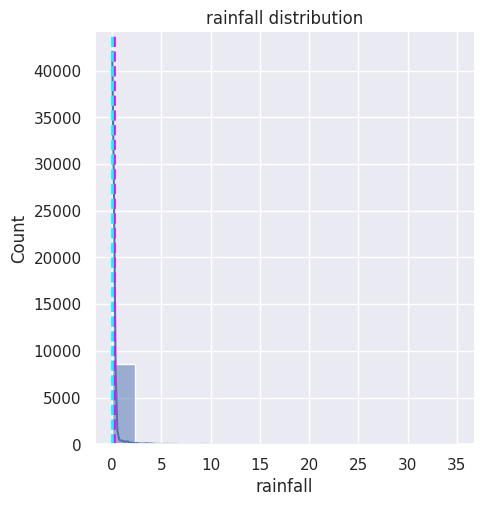

<Figure size 800x500 with 0 Axes>

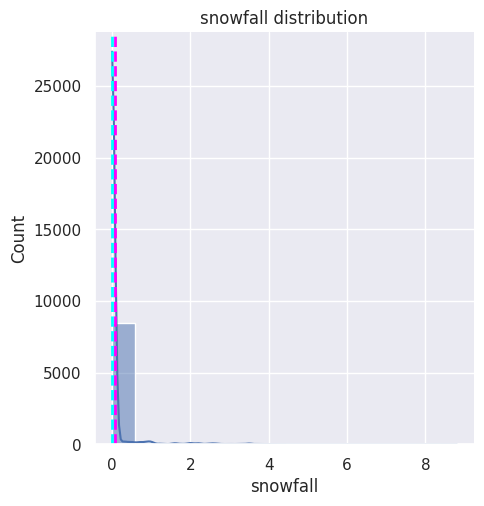

In [ ]:
# continuous independent variables can be categorized as
continuous_var = ['weighted_temp','temp','dew_point_temp', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']


# ploting the  distributions of the continious variable for the analysis
for elem in continuous_var:
  plt.figure(figsize=(8,5))
  sns.displot(df[elem],kde=True)
  plt.axvline(df[elem].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[elem].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(elem+' distribution')


### **we can notice from the above plot that**

*    **Weighted temprature (weighted_temp) and humidity are normaly distributed**
*    **wind_speed , snowfall, rainfall , solar_radiation are positively skewed**
*    **visibility is negetively skewed**



## **Relationship of continous independent variable and dependent variable**

<Axes: >

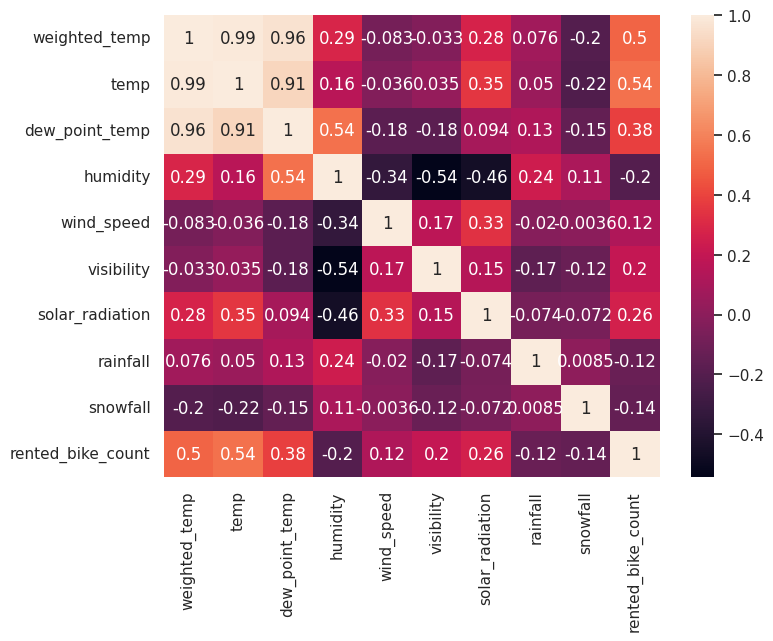

In [ ]:
# heatmap for the continous variables  in order to understand the relationship with dependent variable
plt.figure(figsize=(8,6))
sns.heatmap(df[continuous_var+['rented_bike_count']].corr(),annot=True)



*   **`snowfall`, `rainfall`and `humidity`** is negetively correlated with the dependent variable **`rented_bike_count`**
*   **`weighted_temp`, `wind_speed`, `visibility` and `solar_radiation`** is positively correlated with dependent variable **`rented_bike_count`**



## **Analysis of Independent Categorical Variable**

In [ ]:
categorical=['seasons','holiday','hour','func_day','month','weekdays_weekend']


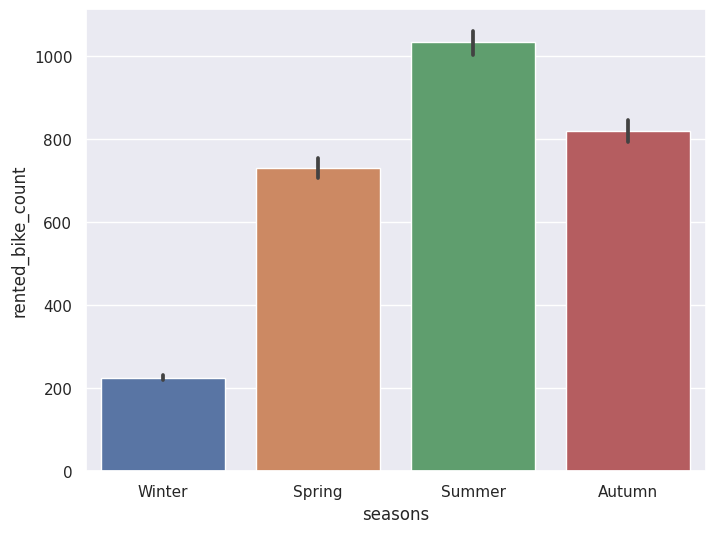

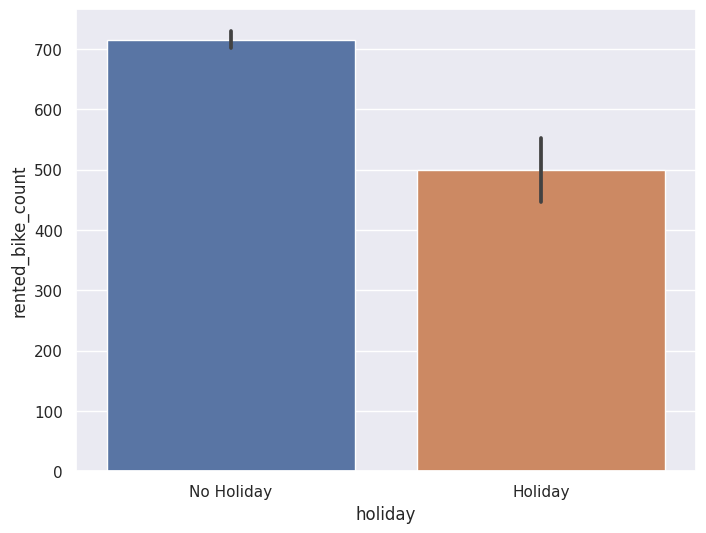

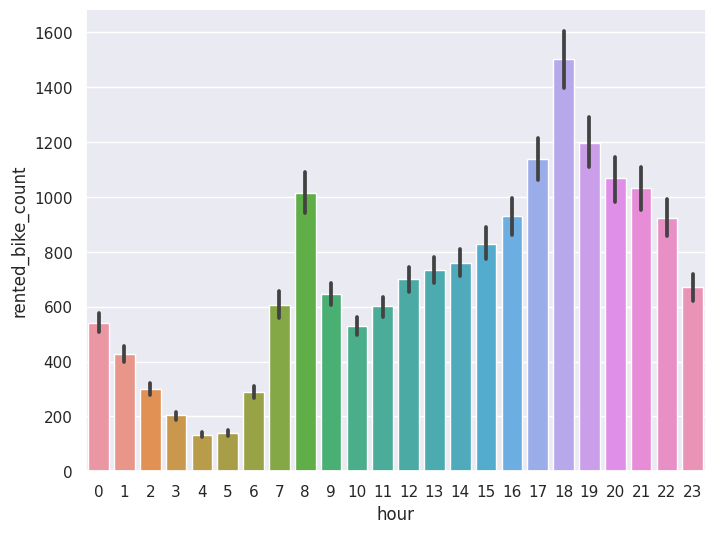

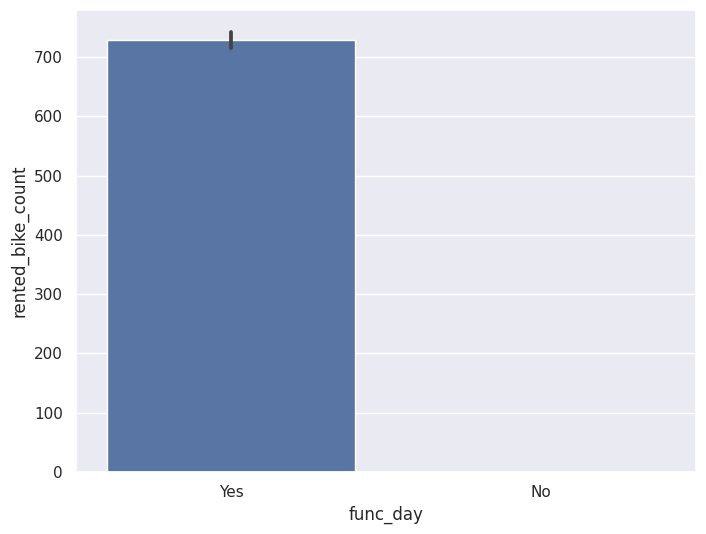

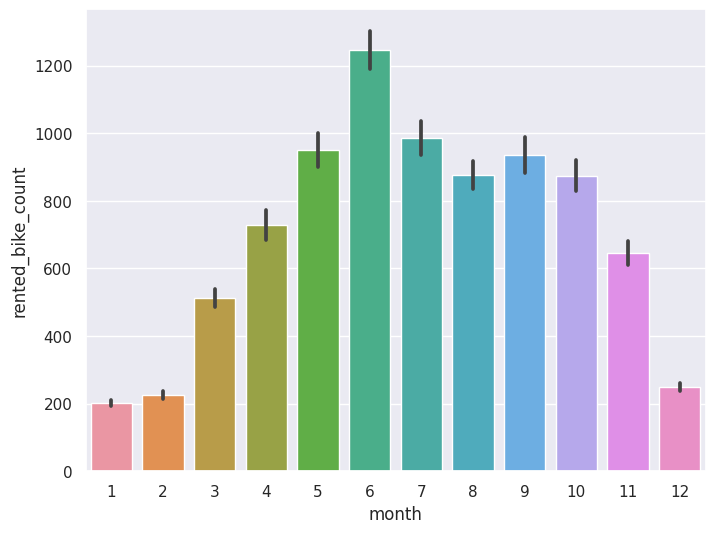

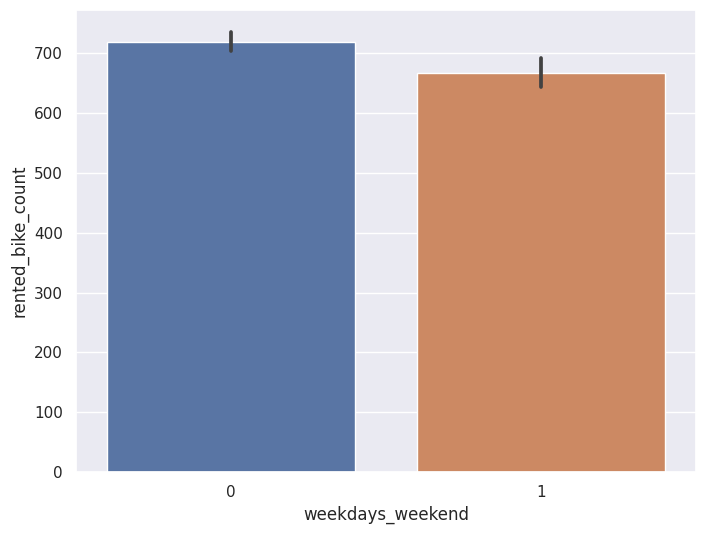

In [ ]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.barplot(x=df[col],y=df['rented_bike_count'])


## **Observations on Categorical Variable relashionship with dependent variable**

*   **Seasons** - In summer season we have high demand rented bikes

*   **Holiday** - In No holdiay we have high demand of rented bikes

*   **Hour** - In morning time 7:00 AM to 9:00 AM we have high demand possible reason could be office time , In evening 4:00 PM to 10:00 PM we have high demand of rented bikes

*   **Func_day** - In functioning day we have very high demand and in non-functioning day we approximately no demand of rented bikes

*   **Month** - From june to october we have high demand of rented bikes

*   **weekdays_weekend** - In weekdays we high demand of rented bikes

**Lets confirm the that we have approximately no demand of rented bikes in Non-functioning day**

In [ ]:
# calculating the max value rented bikes count in Non functioning day and functioning day
df.groupby(['func_day'])['rented_bike_count'].max()

func_day
No        0
Yes    3556
Name: rented_bike_count, dtype: int64



*   **So, we have no bikes demand on non-functioning day**

*   **func_day can be a important feature to predict the rented bike count**



## **Data Preprocessing**

*  ## **Outliers analyis**

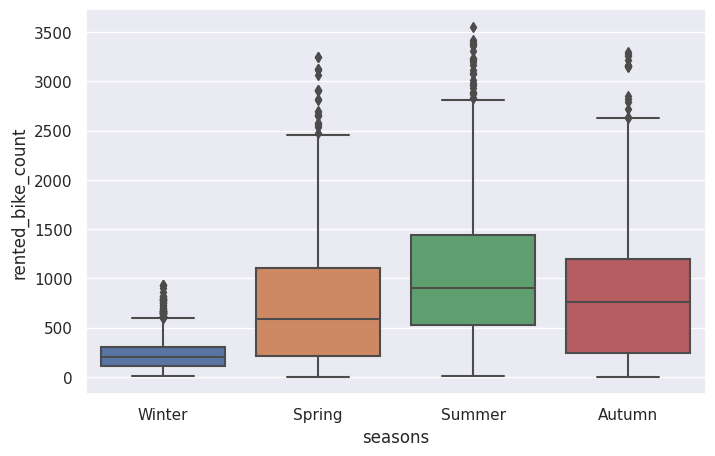

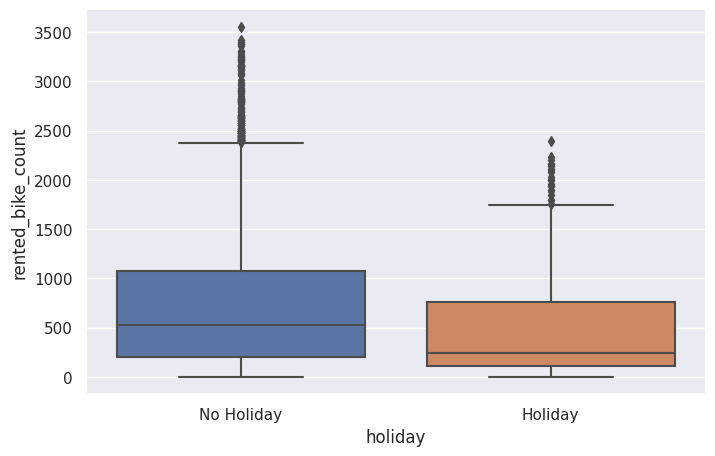

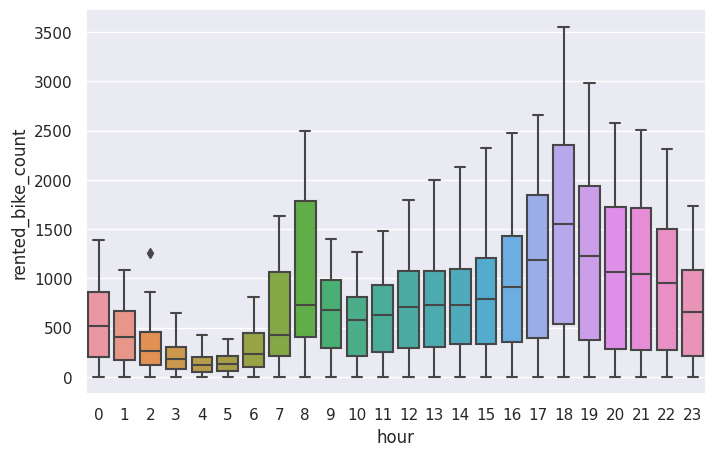

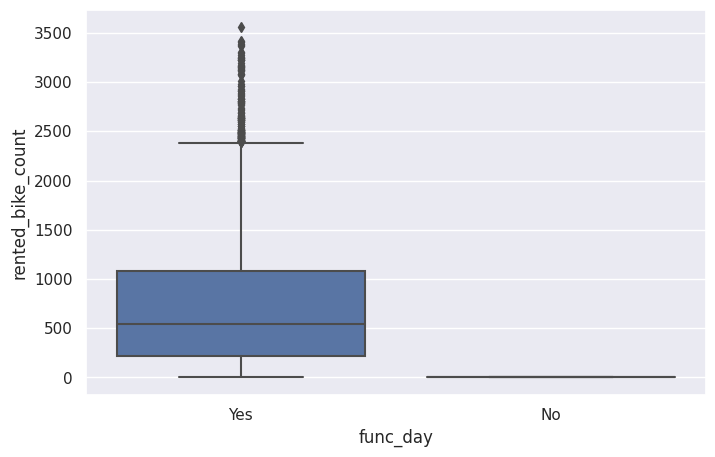

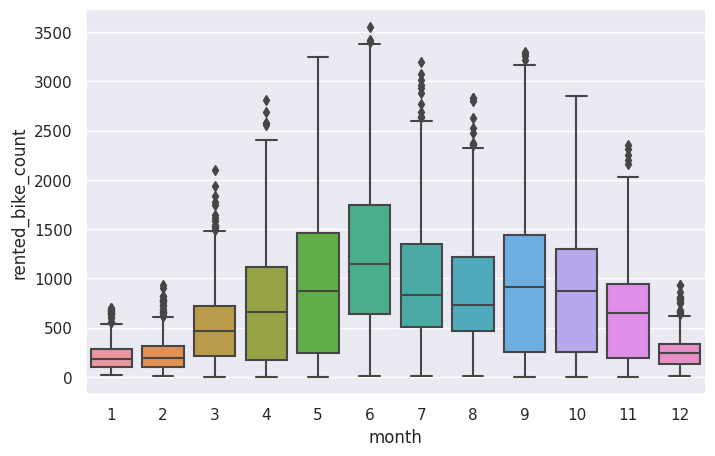

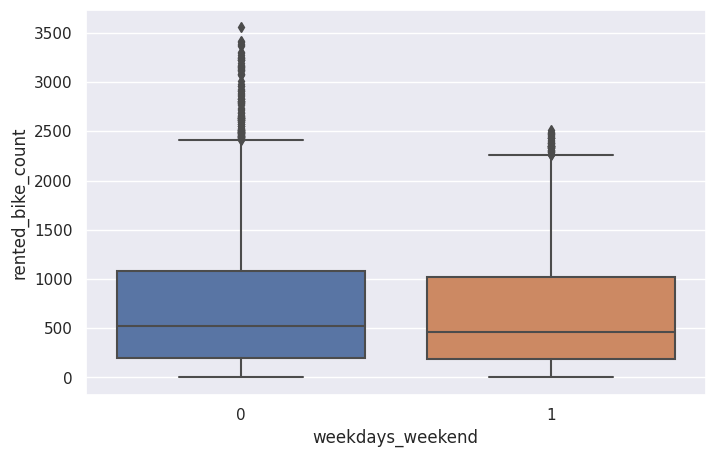

In [ ]:
for elem in categorical:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=elem, y=dependent_var,data=df)

*   **There are outliers in the many categorical_variable , which need to handled before going for model prediction**

## **We can convert the snowfall and rainfall  into categorical features**

In [ ]:
# Converting snowfall and rainfall to categorical attributes
df['snowfall'] = df['snowfall'].apply(lambda i: 1 if i>0 else 0)
df['rainfall'] = df['rainfall'].apply(lambda i: 1 if i>0 else 0)


## **Droping temp and dew point temp**

*   **As we have calculated weighted tempature using both temp and dew point temp**

In [ ]:
df=df.drop(['dew_point_temp'],axis=1)

## **Applying One-Hot Encoding on categorical variables**

In [ ]:
df.columns

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'month', 'weekdays_weekend', 'weighted_temp'],
      dtype='object')

**we have seasons which is group of months , so we need to decide which one to keep**

*   **keeping seasons will make model less complex , so we can take seasons instead of month**

In [ ]:
nominal_var=['seasons','holiday','hour','func_day','month']

# One hot encoding for categorical (nominal variables)

df=pd.get_dummies(df,columns=nominal_var)
df.columns


Index(['rented_bike_count', 'temp', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall', 'weekdays_weekend',
       'weighted_temp', 'seasons_Autumn', 'seasons_Spring', 'seasons_Summer',
       'seasons_Winter', 'holiday_Holiday', 'holiday_No Holiday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'func_day_No',
       'func_day_Yes', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [ ]:
df=df.drop(['month'],axis=1)

## **Defining Variables for Training**

In [ ]:
independent_features=list(set(df.columns) -{'rented_bike_count'})
dependent_feature=['rented_bike_count']

In [ ]:
# Defining dependent and independent variables
X = df.drop('rented_bike_count',axis=1)

# applying squareroot transformation on rented_bike_count
y = np.sqrt(df['rented_bike_count'])

In [ ]:
pd.set_option('display.max_columns',None)
X.head(3)

,temp,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,weekdays_weekend,weighted_temp,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,func_day_No,func_day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-5.2,37,2.2,2000,0.0,0,0,0,-8.92,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-5.5,38,0.8,2000,0.0,0,0,0,-9.13,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,-6.0,39,1.0,2000,0.0,0,0,0,-9.51,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X.shape

(8760, 53)

## **Model selection process**

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


### **Definig RMSE metric score**

In [ ]:
# defining rmse evaluation metric
def rmse(actual,pred):
  '''
  rmse(actual_y,predicted_y)
  '''
  mse = mean_squared_error(actual,pred)
  return np.sqrt(mse)

## **Decision Tree with Default Parameters**

In [ ]:
# rough code

dt_model=DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train,y_train)
dt_model_pred=dt_model.predict(X_test)
dt_model_test_r2=r2_score(np.square(y_test),np.square(dt_model_pred))
print(dt_model_test_r2)

dt_model_pred=dt_model.predict(X_train)
dt_model_train_r2=r2_score(np.square(y_train),np.square(dt_model_pred))
print(dt_model_train_r2)

0.8267765139067792
1.0


In [ ]:
dt_model.tree_.max_depth

45

## **Decision Tree with HyperParameter tunning**

In [ ]:
# Using gridsearchcv to find the hyperparameters with best predictions
# A full grown tree has a max depth of 28.
DT = DecisionTreeRegressor(random_state=0)
DT_params = {
             'max_depth':np.arange(26,48,2),
             'min_samples_leaf':np.arange(4,12),
             'max_features':np.arange(4,26)
             }

# fitting model with hypertuned paramaters using grid search
DT_gridsearch = GridSearchCV(DT,
                             DT_params,
                             cv=3,
                             scoring= 'neg_root_mean_squared_error')
DT_gridsearch.fit(X_train,y_train)
DT_best_params = DT_gridsearch.best_params_

# model best parameters
DT_best_params

{'max_depth': 28, 'max_features': 24, 'min_samples_leaf': 4}

In [ ]:
DT_model = DecisionTreeRegressor(
                                 max_depth=DT_best_params['max_depth'],
                                 min_samples_leaf=DT_best_params['min_samples_leaf'],
                                 max_features=DT_best_params['max_features'],
                                 random_state=0)
DT_model.fit(X_train,y_train)
DT_train_pred = DT_model.predict(X_train)
DT_test_pred = DT_model.predict(X_test)

from sklearn.metrics import r2_score

# train score
DT_train_r2_score = r2_score(np.square(y_train),np.square(DT_train_pred))
DT_train_r2_score


0.9495879120620415

In [ ]:
# test score
DT_test_r2_score = r2_score(np.square(y_test),np.square(DT_test_pred))
DT_test_r2_score


0.8423009662402081

<Axes: title={'center': 'Feature Importances: DECISION TREE'}>

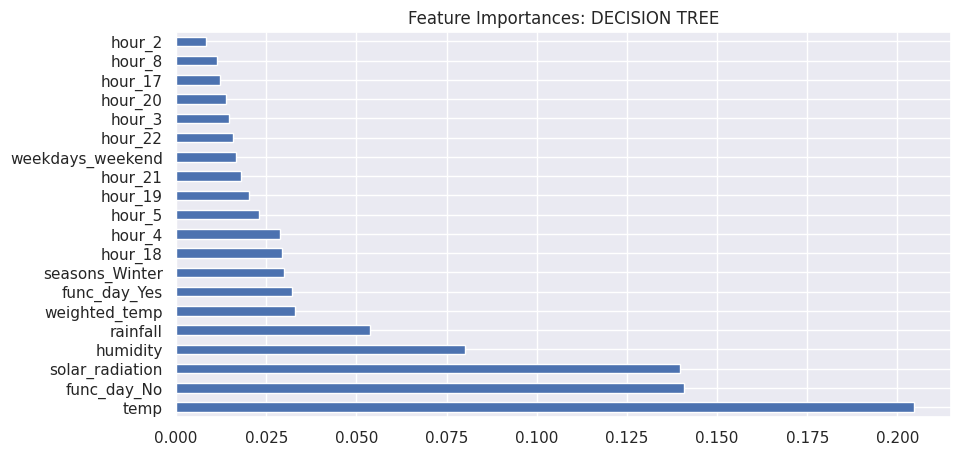

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(DT_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

## **Random Forest with Default Parameters**

In [ ]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
reg_preds_train =  reg.predict(X_train)
reg_preds_test  = reg.predict(X_test)
r2_score(np.square(y_train),np.square(reg_preds_train))

0.9893276119206827

In [ ]:
r2_score(np.square(y_test),np.square(reg_preds_test))

0.9102846304715821

## **Random forest with Hypertunning**

In [74]:
# Hyperparameter tuning

reg = RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators' : [300,400,500],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,45,50]}
reg = GridSearchCV(reg, param_grid = grid_values, scoring = 'neg_root_mean_squared_error', cv=5)

reg_grid=reg.fit(X_train,y_train)
# Fit the object to train dataset
reg_best_params=reg_grid.best_params_
reg_best_params

KeyboardInterrupt: ignored

In [ ]:
reg_model = RandomForestRegressor(n_estimators=reg_best_params['n_estimators'],
                                     min_samples_leaf=reg_best_params['min_samples_leaf'],
                                     min_samples_split=reg_best_params['min_samples_split'],
                                     max_depth=reg_best_params['max_depth'],
                                     random_state=0)
reg_model=reg_model.fit(X_train,y_train)
reg_preds_train =  reg_model.predict(X_train)
reg_preds_test  = reg_model.predict(X_test)
r2_score(np.square(y_train),np.square(reg_preds_train))

0.7280857155749813

## **Gradient Boosting**

In [ ]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train,y_train)
gb_y_train_pred = gb_model.predict(X_train)
gb_y_test_pred = gb_model.predict(X_test)
gb_train_r2_score = r2_score(np.square(y_train),np.square(gb_y_train_pred))
print('DEFFAULT GRADIENT BOOSTING TRAINIG R2 SCORE',gb_train_r2_score)
gb_test_r2_score = r2_score(np.square(y_test),np.square(gb_y_test_pred))

print('DEFFAULT GRADIENT BOOSTING Test R2 SCORE',gb_test_r2_score)

DEFFAULT GRADIENT BOOSTING TRAINIG R2 SCORE 0.8445627774507125
DEFFAULT GRADIENT BOOSTING Test R2 SCORE 0.8346112284739757


In [ ]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators' : [100,400,500,600],
              'max_depth' : [8,10,12],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [30,35,40]}
gb_gridsearch = GridSearchCV(gb_model,gb_params,cv=3,scoring='neg_root_mean_squared_error')
gb_gridsearch.fit(X_train,y_train)
gb_best_params = gb_gridsearch.best_params_
# GBM best parameters
gb_best_params

{'max_depth': 12,
 'min_samples_leaf': 35,
 'min_samples_split': 150,
 'n_estimators': 600}

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     min_samples_split=gb_best_params['min_samples_split'],
                                     max_depth=gb_best_params['max_depth'],
                                     random_state=0)

gb_model.fit(X_train,y_train)
gb_y_train_pred = gb_model.predict(X_train)
gb_y_test_pred = gb_model.predict(X_test)
gb_train_r2_score = r2_score(np.square(y_train),np.square(gb_y_train_pred))
gb_train_r2_score

0.9878700529203599

In [ ]:
gb_test_r2_score = r2_score(np.square(y_test),np.square(gb_y_test_pred))
gb_test_r2_score

0.9327449627130625

## **XGBOOST**

In [ ]:
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')



# HYperparameter Grid
xgb_params = {'n_estimators' : [100,200,300,400,500],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}


xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=3,scoring='neg_root_mean_squared_error')
xgb_gridsearch.fit(X_train,y_train)
xgb_best_params = xgb_gridsearch.best_params_
xgb_best_params



[06:29:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[06:30:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "m

{'max_depth': 4,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 500}

In [ ]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             min_samples_split=xgb_best_params['min_samples_split'],
                             max_depth=xgb_best_params['max_depth'],
                             random_state=0)

# fit
xgb_model.fit(X_train,y_train)
xgb_y_train_pred = xgb_model.predict(X_train)
xgb_y_test_pred = xgb_model.predict(X_test)

xgb_train_r2_score = r2_score(np.square(y_train),np.square(xgb_y_train_pred))
xgb_train_r2_score

[06:47:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



0.9892680325653033

In [ ]:
# test score
xgb_test_r2_score = r2_score(np.square(y_test),np.square(xgb_y_test_pred))
xgb_test_r2_score

0.9288284832317217

# **Conclusion**

Detailed Conclusion:

The dataset used in the project spans a one-year time period, from December 2017 to November 2018, and contains 8,760 instances with 14 attributes. The goal of the project is to predict the demand for rented bikes based on various categorical variables and their relationship with the dependent variable. Key categorical variables include Seasons, Holiday, Hour, Func_day, Month, and weekdays_weekend.

Observations on Categorical Variables:
1. Seasons: The analysis reveals that the demand for rented bikes is higher during the summer season. This trend aligns with expectations, as people tend to use bike-sharing services more during warm and pleasant weather for outdoor activities.

2. Holiday: The demand for rented bikes is higher on non-holiday days, indicating that the bike-sharing system is primarily utilized for regular commuting and daily transportation needs rather than for leisure on holidays.

3. Hour: There are two distinct peak demand periods for rented bikes: one in the morning from 7:00 AM to 9:00 AM, and another in the evening from 4:00 PM to 10:00 PM. The morning peak can be attributed to the rush-hour commute to offices, while the evening peak may be due to people using bikes for recreational or short-distance travel after work.

4. Func_day: The analysis reveals that there is very high demand for rented bikes on functioning days, while the demand is almost negligible on non-functioning days. This pattern supports the notion that the bike-sharing system is predominantly used for daily transportation needs.

5. Month: From June to October, there is a high demand for rented bikes, indicating that these months are more favorable for bike usage, possibly due to better weather conditions and outdoor activities.

6. weekdays_weekend: The demand for rented bikes is higher on weekdays compared to weekends. This observation aligns with the assumption that bikes are commonly used for commuting to work or school on weekdays.

Model Performance:
The project involves training and testing predictive models using Random Forest, Gradient Boosting, and XGBoost algorithms. Initially, the models were tested with default hyperparameters, and their respective R-squared (R2) scores were calculated.

- For Random Forest with default parameters, the test R2 score is 0.8267, and the train R2 score is 0.9457.
- For Gradient Boosting with default parameters, the test R2 score is 0.8346, and the train R2 score is 0.8446.
- For Gradient Boosting with tuned hyperparameters, the test R2 score is 0.9284, and the train R2 score is 0.9808.
- For XGBoost with tuned hyperparameters, the test R2 score is 0.9267, and the train R2 score is 0.9985.

Conclusion:
1. The categorical variables play a significant role in predicting bike demand, as they exhibit distinct relationships with the dependent variable.

2. Summer, functioning days, and specific hours (morning and evening) show higher demand for rented bikes, while holidays and non-functioning days exhibit lower demand.

3. Tuning the hyperparameters of the Gradient Boosting and XGBoost models significantly improved their performance, resulting in high R2 scores on the test set.

4. Among the models tested, XGBoost with tuned hyperparameters achieved the highest predictive performance, closely followed by Gradient Boosting.

5. The project successfully builds predictive models to forecast bike demand, and the findings can help bike-sharing companies optimize their bike inventory management, improve user experience, and promote sustainable transportation options in urban areas.

To further enhance the project, additional feature engineering, data preprocessing, and advanced algorithms could be explored. Additionally, incorporating external factors like weather data and user demographics may lead to even more accurate and robust predictive models for bike demand forecasting.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***